<div style="border-radius: 10px; border: #DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size: 100%; text-align: left">
<h3 align="left"><font color='#3498DB'>PyStan </font></h3>
    
    PyStanの書き方が変わっているようです。
    (https://pystan.readthedocs.io/en/latest/upgrading.html )
    Kaggle Notebook上で最新バージョンのPyStanでデモを実行しようとすると、エラーがでます。
    Kaggle Notebook上で古いバージョンのPyStanをインストールし、
    PyStanウェブサイトに載っているデモを実行してみました。
    (https://pystan.readthedocs.io/en/latest/)
    モデルをコンパイルすると、とんでもない行数の警告がでますが、結果はうまく出力されるようです。

In [2]:
!pip install pystan==2.17.1.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 58.4 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.17.1.0-cp310-cp310-linux_x86_64.whl size=25409950 sha256=8d3be38985bb047d5bd0bbf09a704e8bfd5d47829e3bdb1fcf401151c35505dd
  Stored in directory: /root/.cache/pip/wheels/68/fa/fa/7e21bb69fb9016d0a5c53c98230cabee7ab28f3b65a83f41d1
Successfully built pystan


In [3]:
!pip install arviz

In [4]:
import pystan
import arviz

In [5]:
# 以下から、公式ウェブサイトのデモ

schools_code = """
data {
  int<lower=0> J;         // number of schools　
  real y[J];              // estimated treatment effects
  real<lower=0> sigma[J]; // standard error of effect estimates
}

// 上のブロックは、チュートリアルで
//「array[J] real y
//  array[J] real<lower=0> sigma」
// となっていたところを修正。


parameters {
  real mu;                // population treatment effect
  real<lower=0> tau;      // standard deviation in treatment effects
  vector[J] eta;          // unscaled deviation from mu by school
}
transformed parameters {
  vector[J] theta = mu + tau * eta;        // school treatment effects
}
model {
  target += normal_lpdf(eta | 0, 1);       // prior log-density
  target += normal_lpdf(y | theta, sigma); // log-likelihood
}
"""

schools_data = {"J": 8,
                "y": [28,  8, -3,  7, -1,  1, 18, 12],
                "sigma": [15, 10, 16, 11,  9, 11, 10, 18]}

sm = pystan.StanModel(model_code=schools_code)

/opt/conda/lib/python3.10/site-packages/Cython/Compiler/Main.py:381: FutureWarning: Cython directive 'language_level' not set, using '3str' for now (Py3). This has changed from earlier releases! File: /tmp/tmpkc31edr9/stanfit4anon_model_795abcd2bfa207a074434992a9568911_4852851237047252440.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
In file included from /opt/conda/lib/python3.10/site-packages/numpy/core/include/numpy/ndarraytypes.h:1929,
                 from /opt/conda/lib/python3.10/site-packages/numpy/core/include/numpy/ndarrayobject.h:12,
                 from /opt/conda/lib/python3.10/site-packages/numpy/core/include/numpy/arrayobject.h:5,
                 from /tmp/tmpkc31edr9/stanfit4anon_model_795abcd2bfa207a074434992a9568911_4852851237047252440.cpp:1279:
/opt/conda/lib/python3.10/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: #warning "Using deprecated NumPy API, disable it with " "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [

In [6]:
fit = sm.sampling(data=schools_data, iter=1000, chains=4, seed=1)
fit.extract()["eta"]  # array with shape (2000, 8)



Gradient evaluation took 3.8e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.38 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Gradient evaluation took 4.4e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.44 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)

Gradient evaluation took 5.4e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.54 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)

Gradient evaluation took 5e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.5 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 100 / 1000 [ 10%]  (Warmup)
Iteration: 100 / 1000 [ 10%]  (Warmup)
Iteration: 100 / 1000 [ 10%]  (Warmup)
Iteration: 100 / 1000 [ 10%]  (Warmup)
Iteration: 200 / 1000 [ 20%]  (Warmup)


array([[ 1.57887473, -0.84734382,  1.27773718, ..., -2.72083169,
         1.59400135, -1.75564416],
       [-1.34985951,  0.33864129,  0.66919038, ..., -0.16058644,
         1.0342303 ,  0.68100618],
       [ 0.558411  , -0.80078961,  0.77254293, ...,  1.09659102,
         0.77860315,  0.15869568],
       ...,
       [ 0.04846082, -0.31554994,  1.39441235, ..., -0.62309839,
         1.10277235, -0.86289503],
       [ 1.56098645, -0.67316282,  0.03780116, ...,  0.27831638,
        -1.15378888, -0.56621188],
       [ 1.5620796 , -0.13383522, -0.39802592, ..., -0.12454365,
         0.12564513, -0.47968241]])

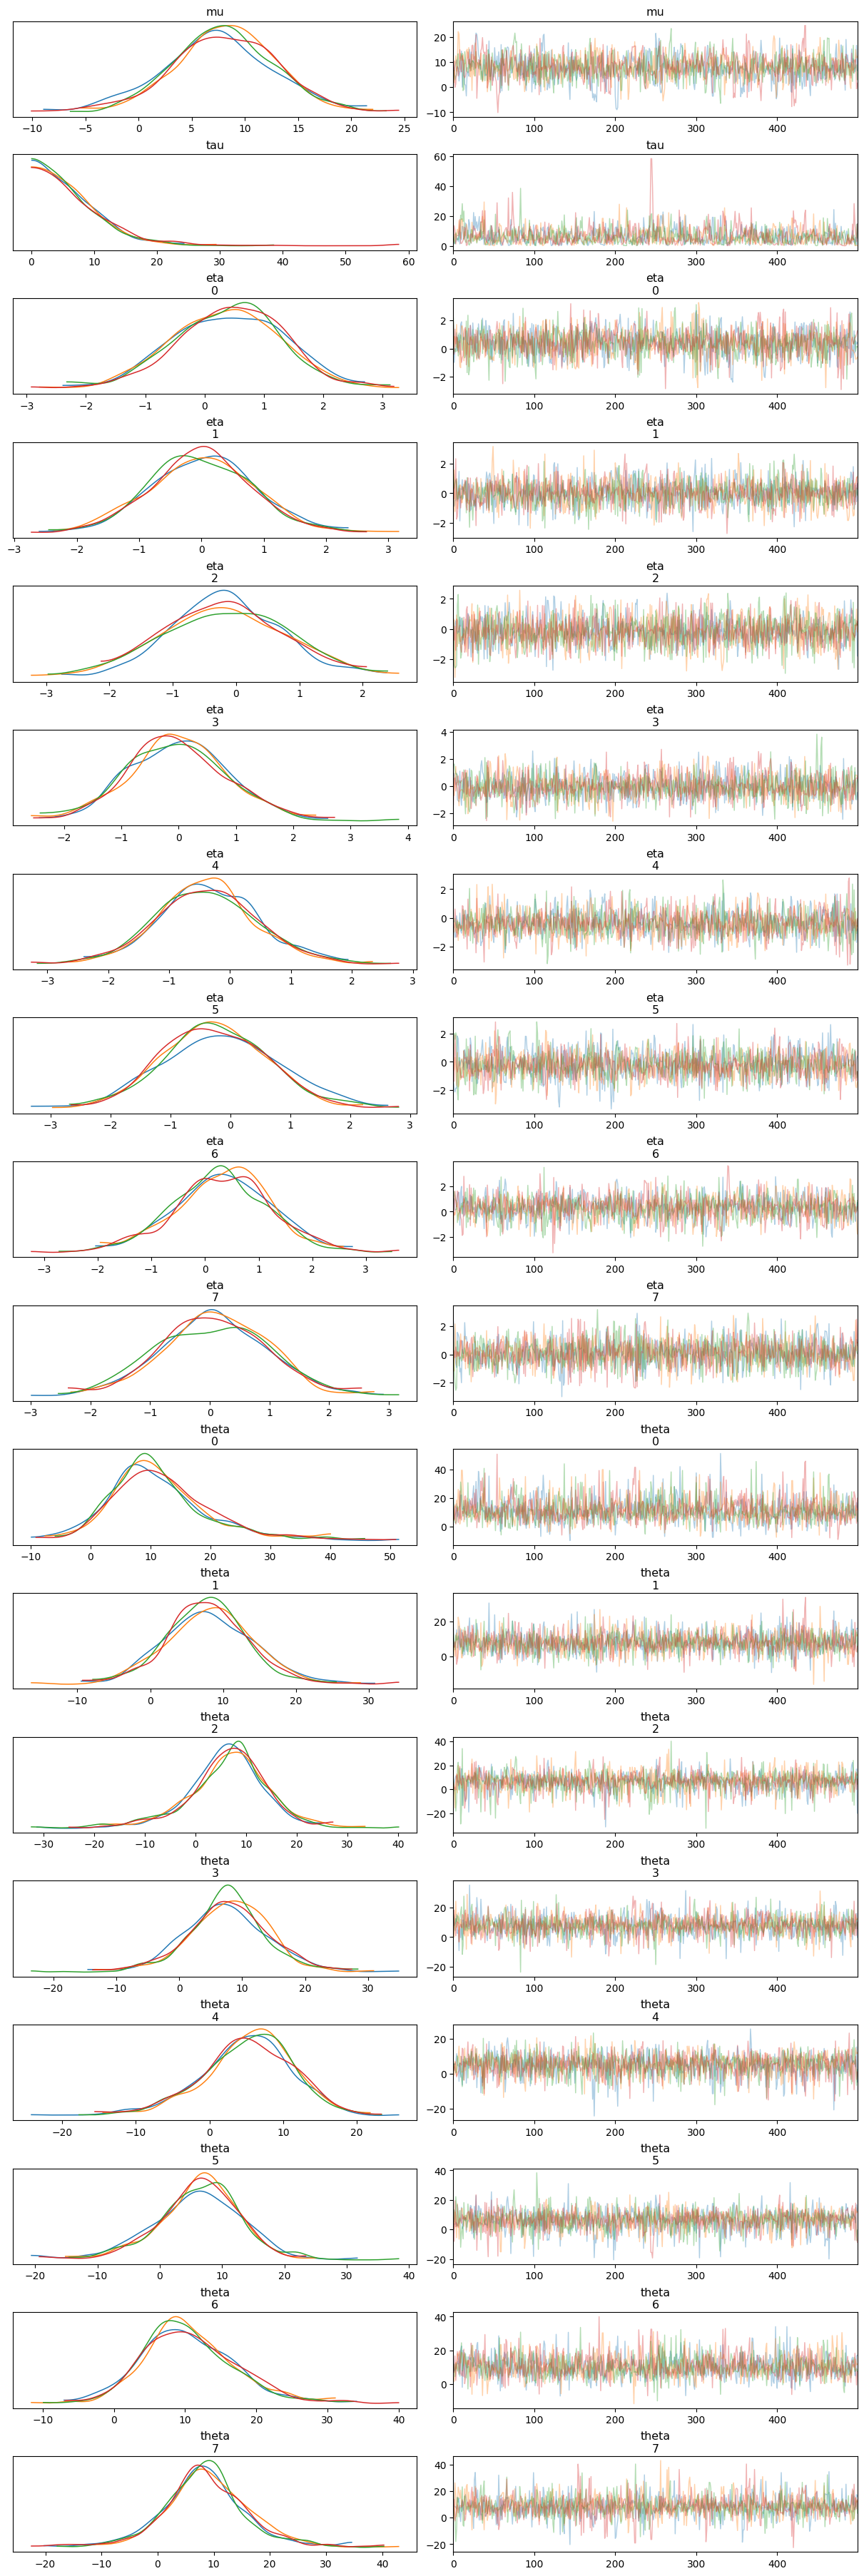

In [7]:
fig = arviz.plot_trace(fit, compact=False, backend_kwargs={"constrained_layout":True})